# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Soldier Race Project (Supervised Project)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to know about our latest updates, please don't forget to follow us! </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# About Dataset

**ANSUR II Databases: Ethnicity Prediction**

**1. Overview:**  
- ANSUR II (Anthropometric Survey of U.S. Army Personnel) is based on the results of a large-scale anthropometric (body measurements) study conducted by the U.S. Army in 2012.

**2. Dataset Content:**

- ANSUR II includes body measurements and ethnicity data for military personnel. The dataset contains over 100 measurements from various body parts of individuals. These measurements include details of the head, hand, foot, leg, arm, chest, and more.

- The dataset contains 93 directly measured anthropometric variables and 15 demographic/administrative variables described below.

- The male dataset includes a sample of 4,082 subjects.

- The ANSUR II female dataset contains a sample of 1,986 subjects.

- In addition to anthropometric and demographic data, the ANSUR II database also includes 3D full-body, foot, and head scans of the participants. However, these 3D data are not publicly available to respect the privacy of ANSUR II participants.

**3. Who Participated?**
- This database includes representatives from various ethnic groups and age groups of active-duty military personnel. The dataset contains measurements from both male and female participants.

**4. Relationship Between Measurement and Ethnicity:**
- Different ethnic groups may have distinct body structures due to genetic and environmental factors. This can be observed through variations in measurements such as leg length, head shape, hand, and foot dimensions.

**5. Modeling and Prediction:**
- Ethnicity prediction can be approached as a classification problem using the body measurements in the ANSUR II dataset.
- The algorithm to be used will learn the relationship between measurements and ethnicity and can be applied to new data to make ethnicity predictions.

**6. Importance and Application Areas of the Project:**
- Such research is used to analyze body measurements of military personnel to inform the design and production of military equipment, clothing, and other systems. Accurate measurements are crucial for the comfort, mobility, and overall safety of military personnel.

- Additionally, this has many potential commercial, industrial, and academic applications.

- Furthermore, for example, with laser readers and sensors, it might be possible to detect ethnicity upon entry at an airport.

DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

# Tasks

**Exploratory Data Analysis (EDA)**

- Import Libraries

- Load the Dataset

- Explore the Data

**Data Preprocessing**

- Scaling (if necessary)

- Split the dataframe for evaluation purposes

**Classification Algorithms**

- Apply Logistic Regression

- Apply SVM Classifier

- Apply Decision Tree Classifier

- Apply Random Forest Classifier

- Apply XGBoost Classifier

- Compare the Models

SMOTE

SHAP

# EDA

**Retrieve data from the following links and create a data frame**

- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [53]:
import numpy as np
import pandas as pd

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import pickle


In [3]:
# Let's import data for male and female soldiers
df_m = pd.read_csv("ansur_male.csv", encoding='ISO-8859-1')
df_f = pd.read_csv("ansur_female.csv", encoding='ISO-8859-1')

In [4]:
df_m.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [5]:
df_f.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
DODRace,2,3,1,2,1
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195


In [6]:
df_f.shape,df_m.shape

((1986, 108), (4082, 108))

In [7]:
df_f.info(),df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


(None, None)

In [8]:
# Both dataframes have same number of columns. Let's concat them.
df = pd.concat([df_m,df_f])

In [9]:
df.shape

(6068, 109)

In [10]:
# The number of columns increased by one because one dataset has SubjectId, another one has it as subjectid.
df_f = df_f.rename(columns = {"SubjectId":"subjectid"})

In [11]:
# Let's concat them again
df = pd.concat([df_m,df_f])
df.shape

(6068, 108)

In [12]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [14]:
df.isnull().sum().any()

True

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()[df.isnull().sum()>0]

Ethnicity    4647
dtype: int64

In [17]:
# Let's create a copy of df before making adjustments
df_raw = df.copy()

In [18]:
# As per assignment instructions let's drop some columns that will be not needed or cause multicollinearity
df = df.drop(columns=['subjectid','Ethnicity','SubjectNumericRace','Heightin','Weightlbs','WritingPreference'])

DODRace – Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option.

This variable is intended to be comparable to the Defense Manpower Data Center demographic data. 

Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,

5 = Native American, 6 = Pacific Islander, 8 = Other

In [19]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [20]:
df.DODRace.dtype

dtype('int64')

In [21]:
# We will keep only the first three races as per assignment terms by dropping values with less that 500 counts
df = df[df.DODRace<=3]

In [22]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [23]:
df.shape

(5769, 102)

In [24]:
df.isnull().sum().any()

False

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64


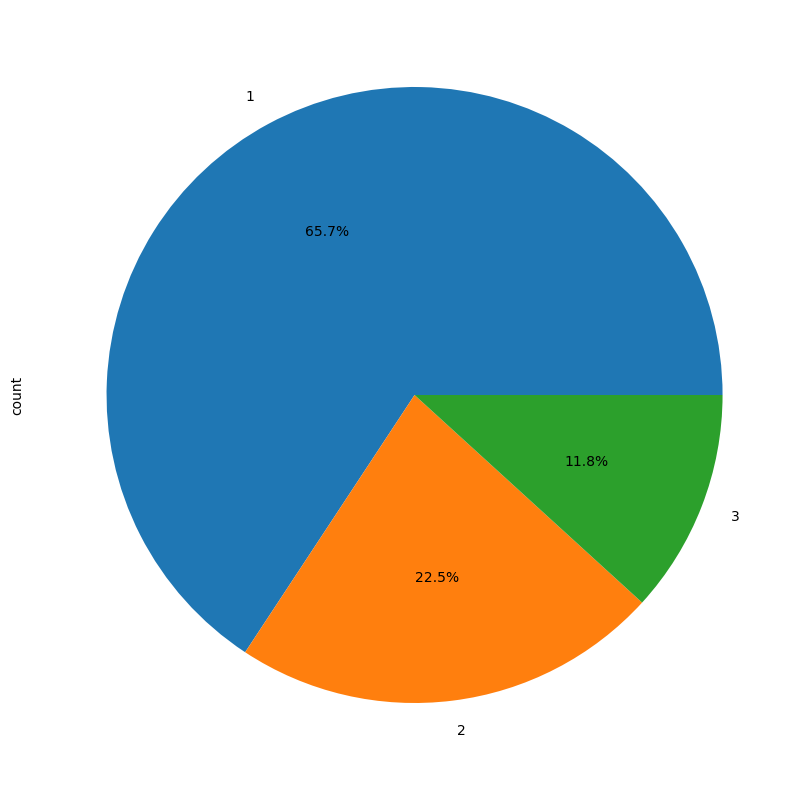

In [25]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

The dataset is highly imbalanced in favor of White race, while Hispanic race having the least share

In [26]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,...,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,41
1,233,1395,326,220,1293,245,193,394,338,257,...,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,35
2,287,1430,341,230,1327,256,196,427,408,261,...,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,42
3,234,1347,310,230,1239,262,199,401,359,262,...,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,31
4,250,1585,372,247,1478,267,224,435,356,263,...,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,21


In [27]:
# to find how many unique values object features have
for columns in df.select_dtypes(exclude=[np.number]).columns:
    print(f"{columns} has {df[columns].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 281 unique value
SubjectsBirthLocation has 136 unique value


Controlling for non-numeric features are important, because it will cause our data to grow bigger when we apply the get dummies operation and will not yield any meaningful results. Therefore, it is better to drop unmeaningfull categorical featurs.

* Date column: This is unlikely to have any direct correlation with the soldier’s race. It might be more relevant for time-series analysis or equipment performance, but not for predicting race.
* Component: Component could have some indirect relation to race, depending on demographic distributions within different military branches. However, it’s unlikely to be a primary predictor and may introduce bias.
* PrimaryMOS: While some job classifications may have racial disparities, this is unlikely to be a strong predictor of race. Including it may introduce bias if certain MOS roles are predominantly held by particular racial groups.
* Installation: While location might have some demographic correlation (i.e., different bases could have different racial compositions), it is more likely that this column will add noise rather than provide useful predictive power for the model.

In [28]:
df = df.drop(columns=["Date", "Installation", "Component","PrimaryMOS"])

In [29]:
df.shape

(5769, 98)

In [30]:
# Let's examine numeric columns
df.select_dtypes(include='number').corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
abdominalextensiondepthsitting,1.000000,0.351934,0.312919,0.518896,0.280824,0.456729,0.332593,0.417617,0.691126,0.505856,...,0.858962,0.939645,0.958716,0.579494,0.147130,0.825198,0.546947,0.383157,-0.031860,0.385555
acromialheight,0.351934,1.000000,0.868267,0.504673,0.987115,0.693952,0.797793,0.733288,0.522740,0.401588,...,0.438562,0.405161,0.362314,0.607020,0.930954,0.677768,0.733564,0.921268,-0.217393,0.082966
acromionradialelength,0.312919,0.868267,1.000000,0.416051,0.857391,0.604208,0.725966,0.667377,0.452499,0.343457,...,0.373562,0.354902,0.327976,0.480876,0.845864,0.595740,0.642518,0.677140,-0.158561,0.081739
anklecircumference,0.518896,0.504673,0.416051,1.000000,0.461200,0.709550,0.561528,0.536816,0.637641,0.450363,...,0.585273,0.564041,0.510282,0.482198,0.408262,0.741326,0.697485,0.508567,-0.157784,-0.026483
axillaheight,0.280824,0.987115,0.857391,0.461200,1.000000,0.657023,0.785011,0.705028,0.457740,0.361619,...,0.362550,0.328417,0.290065,0.567598,0.946468,0.613565,0.685336,0.903063,-0.205576,0.044501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weightkg,0.825198,0.677768,0.595740,0.741326,0.613565,0.730920,0.645382,0.703679,0.875365,0.580564,...,0.858881,0.872855,0.830974,0.679795,0.519696,1.000000,0.798308,0.665846,-0.096400,0.233398
wristcircumference,0.546947,0.733564,0.642518,0.697485,0.685336,0.827143,0.743230,0.803051,0.760451,0.348062,...,0.578244,0.576793,0.553025,0.617985,0.632789,0.798308,1.000000,0.663459,-0.174408,0.150658
wristheight,0.383157,0.921268,0.677140,0.508567,0.903063,0.629620,0.683307,0.621811,0.501066,0.460298,...,0.479839,0.440938,0.388914,0.617996,0.812746,0.665846,0.663459,1.000000,-0.267874,0.110000
DODRace,-0.031860,-0.217393,-0.158561,-0.157784,-0.205576,-0.111249,-0.059867,-0.113701,-0.031438,-0.203874,...,-0.125099,-0.071195,-0.031391,-0.160391,-0.174910,-0.096400,-0.174408,-0.267874,1.000000,0.013222


In [31]:
# Calculate the correlation matrix for numeric columns
df_temp = df.select_dtypes('number').corr()

# Initialize count and lists for features and collinear pairs
count = 0
feature = []
collinear = []

# Loop through the correlation matrix and identify strong correlations
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i] > 0.9 and df_temp[col][i] < 1) or (df_temp[col][i] < -0.9 and df_temp[col][i] > -1):
            # Ensure we only count each pair once
            if i != col and i not in feature:
                feature.append(col)
                collinear.append(i)
                count += 1  # Increment the count
                print(f"Multicollinearity alert between {col} and {i}")

# Output the number of strong correlated features
print("Number of strong correlated features:", count)


Multicollinearity alert between abdominalextensiondepthsitting and waistcircumference
Multicollinearity alert between abdominalextensiondepthsitting and waistdepth
Multicollinearity alert between acromialheight and axillaheight
Multicollinearity alert between acromialheight and cervicaleheight
Multicollinearity alert between acromialheight and chestheight
Multicollinearity alert between acromialheight and iliocristaleheight
Multicollinearity alert between acromialheight and kneeheightsitting
Multicollinearity alert between acromialheight and stature
Multicollinearity alert between acromialheight and suprasternaleheight
Multicollinearity alert between acromialheight and tenthribheight
Multicollinearity alert between acromialheight and waistheightomphalion
Multicollinearity alert between acromialheight and wristheight
Multicollinearity alert between acromionradialelength and shoulderelbowlength
Multicollinearity alert between acromionradialelength and sleeveoutseam
Multicollinearity aler

It looks like we have identified 143 pairs of highly correlated features in the ANSUR II dataset with multicollinearity alerts. These strong correlations (with correlation coefficients greater than 0.9 or less than -0.9) indicate that these pairs of features are highly similar in terms of the information they provide. This can cause issues such as:

* Redundancy in Data: When two features are highly correlated, they essentially provide the same information, leading to redundancy.
* Multicollinearity: This can negatively impact the performance of models like linear regression, logistic regression, or any other models that rely on independent features. It can also affect the interpretability of models.

To address this issue we will use Principal Component Analysis


In [ ]:
# df.to_csv('df.csv',index=None)
# df= pd.read_csv('df.csv')

In [32]:
# Separate features and target variable
X = df.drop('DODRace', axis=1)
y = df['DODRace']


In [33]:
X.shape

(5769, 97)

In [34]:
# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'han

In [36]:
#Let's apply label encoding to Gender feature as it has only two categories
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender']) 

In [37]:
# One-Hot Encoding for Categorical Columns with More Than Two Categories
# One-Hot Encoding, dropping one category to avoid multicollinearity
X = pd.get_dummies(X, columns=['Branch', 'SubjectsBirthLocation'], drop_first=True)  

In [38]:
# Save the column names generated by `pd.get_dummies()`
columns_after_encoding = X.columns

In [39]:
X.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'SubjectsBirthLocation_United States', 'SubjectsBirthLocation_Utah',
       'SubjectsBirthLocation_Venezuela', 'SubjectsBirthLocation_Vermont',
       'SubjectsBirthLocation_Virginia', 'SubjectsBirthLocation_Washington',
       'SubjectsBirthLocation_West Virginia',
       'SubjectsBirthLocation_Wisconsin', 'SubjectsBirthLocation_Wyoming',
       'SubjectsBirthLocation_Zambia'],
      dtype='object', length=232)

In [40]:
X.shape

(5769, 232)

In [41]:
# Now we can standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

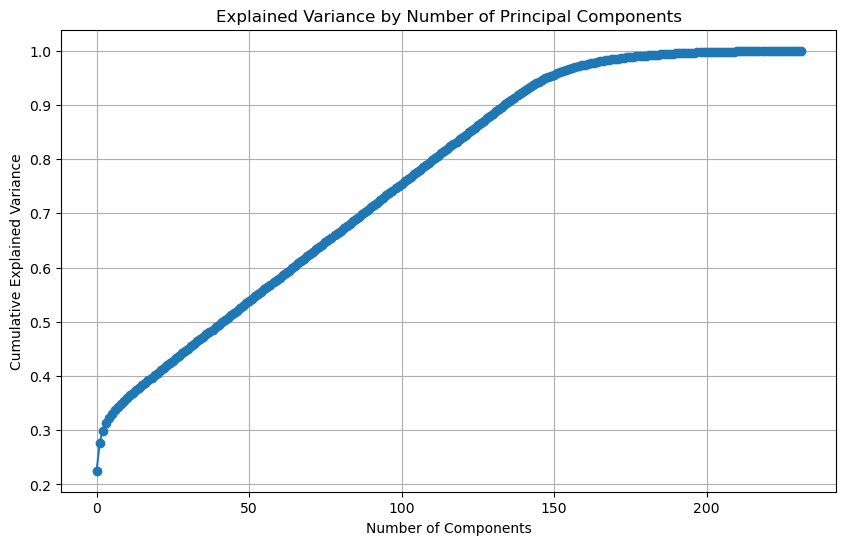

In [42]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

Re-apply PCA with Selected Number of Components

We  decide to keep enough components to explain 95% of the variance.

In [43]:
# Decide on the number of components
variance_threshold = 0.90
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
print(f'Number of components to explain {variance_threshold*100}% variance: {n_components}')

# Re-apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


Number of components to explain 90.0% variance: 135


In [44]:
# Get the loading scores
loading_scores = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=X.columns)

# Display the loadings
loading_scores


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135
abdominalextensiondepthsitting,-0.080483,-0.190900,0.033696,0.051365,-0.166313,-0.019585,-0.036455,0.014907,0.028132,-0.047965,...,-0.000751,-0.002912,-0.003505,0.011767,0.003652,0.021453,-0.006243,-0.014000,0.030373,0.047376
acromialheight,-0.126427,0.081542,0.059752,-0.109044,-0.028659,0.015052,-0.037936,0.019459,-0.003391,0.029125,...,-0.001733,-0.000404,0.002968,-0.002077,0.001772,0.003625,-0.001436,-0.016678,0.019628,0.004023
acromionradialelength,-0.114363,0.089783,0.075944,0.013002,-0.070481,-0.024786,-0.002716,-0.053774,-0.015459,-0.093680,...,-0.024148,0.014814,-0.007651,0.029207,0.030568,0.011012,0.023424,-0.007036,0.007458,0.015157
anklecircumference,-0.092739,-0.096971,0.000278,-0.030704,0.249489,-0.032487,0.137707,0.152457,-0.087047,-0.082141,...,-0.003347,0.007385,-0.016602,-0.003840,-0.006089,-0.014329,0.002615,-0.009627,-0.061967,-0.005248
axillaheight,-0.121753,0.104207,0.076669,-0.102714,-0.014187,0.017048,-0.033018,0.015515,0.002192,0.027653,...,0.000251,-0.003376,0.003735,-0.004246,-0.004984,0.001063,-0.001961,-0.018067,0.019813,-0.000249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectsBirthLocation_Washington,0.001465,-0.001510,-0.001529,-0.035251,0.019878,-0.008764,0.023325,0.020095,-0.021944,0.029341,...,-0.022520,-0.110900,0.060687,-0.068447,0.037482,0.003606,0.097064,0.044298,0.023179,0.011529
SubjectsBirthLocation_West Virginia,0.002421,0.004206,-0.000368,-0.024938,-0.005175,0.003989,0.019528,-0.002797,0.014644,0.003173,...,0.136097,-0.018973,-0.093069,-0.135829,0.013894,-0.026719,-0.025263,-0.010590,0.036176,-0.013324
SubjectsBirthLocation_Wisconsin,0.000762,0.003576,0.026390,-0.033259,0.016187,-0.026440,-0.004697,0.002771,-0.038573,0.026811,...,-0.004158,-0.012897,-0.022204,-0.094981,-0.041453,-0.042184,-0.110473,0.107058,0.017440,0.117897
SubjectsBirthLocation_Wyoming,0.001501,-0.003086,-0.002076,-0.002387,0.002191,-0.022887,-0.004182,-0.031142,-0.002936,-0.001188,...,0.116580,-0.101039,0.030539,-0.055415,-0.057524,-0.136334,0.169862,0.045485,0.192112,0.168602


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [45]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [46]:
X_train.shape, X_test.shape

((4615, 135), (1154, 135))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## Logistic model

Training Accuracy: 0.9083423618634886
Test Accuracy: 0.8882149046793761
Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.88      0.96      0.92       733
           2       0.93      0.89      0.91       282
           3       0.80      0.50      0.62       139

    accuracy                           0.89      1154
   macro avg       0.87      0.78      0.82      1154
weighted avg       0.89      0.89      0.88      1154



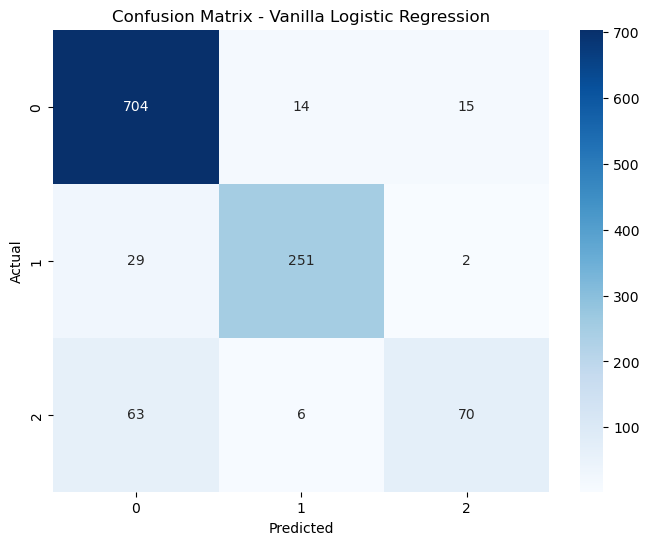

In [42]:
# Instantiate the logistic regression vanilla model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Check the accuracy on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Classification report on test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix on test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Vanilla Logistic Regression')
plt.show()


Check for Overfitting/Underfitting:

* If the training accuracy is significantly higher than the test accuracy, the model might be overfitting.
* If both accuracies are low, the model could be underfitting.

Based on our vanilla model resutls, accuracy levels are good, but test accruacy is a bit lower than the train accuracy level. Let's apply Hyperparameter Tuning with GridSearchCV

In [43]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001,0.01],
    'penalty': ['l1', 'l2'],  # Regularization
    'solver': ['liblinear', 'saga'],  # Solvers that support both l1 and l2
    'max_iter': [2000]
}

# Setup GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Hyperparameters from GridSearchCV: {'C': 0.01, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}


In [44]:
# Get the best model from GridSearchCV
best_logreg = grid_search.best_estimator_

# Fit the model to the training data (already done by GridSearchCV, but we can ensure it's applied here)
best_logreg.fit(X_train, y_train)


LogisticRegression(C=0.01, max_iter=2000, random_state=42, solver='saga')

In [45]:
# Predict on the training set
y_train_pred_best = best_logreg.predict(X_train)

# Predict on the test set
y_test_pred_best = best_logreg.predict(X_test)

# Evaluate the accuracy on both sets
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f"Training Accuracy after tuning: {train_accuracy_best}")
print(f"Test Accuracy after tuning: {test_accuracy_best}")


Training Accuracy after tuning: 0.8910075839653304
Test Accuracy after tuning: 0.8743500866551126


In [46]:
# Classification report on test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_best))


Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.87      0.96      0.91       733
           2       0.90      0.85      0.88       282
           3       0.87      0.44      0.58       139

    accuracy                           0.87      1154
   macro avg       0.88      0.75      0.79      1154
weighted avg       0.88      0.87      0.86      1154



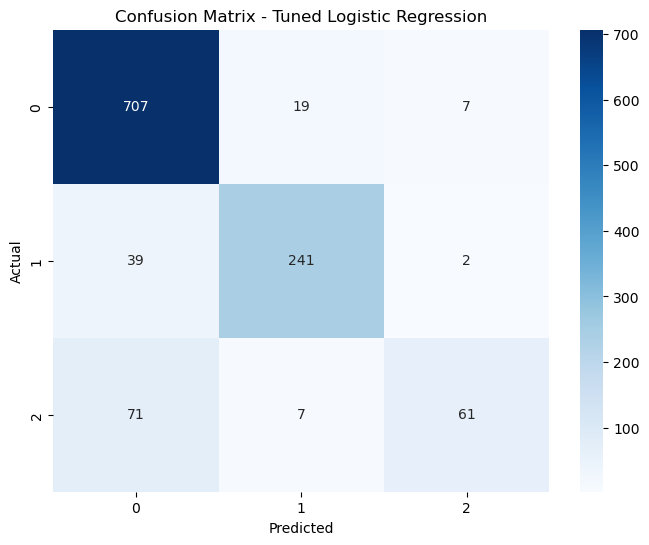

In [47]:
# Confusion matrix on test set
conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()


Class Imbalance: It seems Class 1 is significantly more frequent than Class 3 (733 vs. 139 instances). This could be affecting the model's ability to predict Class 3 accurately.

* Possible Solution: We can try techniques like oversampling (e.g., SMOTE) or undersampling to balance the dataset.
* Class Weights: Another option is to use the class_weight='balanced' parameter in logistic regression to give more weight to the less frequent classes.

Recall for Class 3: The recall for Class 3 is quite low, meaning that many instances of Class 3 are being misclassified.

* Possible Solution: Adjusting the regularization (C) or trying other models like Random Forests or XGBoost, which might perform better with imbalanced datasets, could help.

In [48]:
# We will use the class_weight='balanced' parameter in logistic regression to give more weight to the less frequent classes.
best_logreg = LogisticRegression(C=0.01, penalty='l2', solver='saga', max_iter=2000, class_weight='balanced')

# Fit the model to the training data
best_logreg.fit(X_train, y_train)


LogisticRegression(C=0.01, class_weight='balanced', max_iter=2000,
                   solver='saga')

In [49]:
# Predict on the training set
y_train_pred_best = best_logreg.predict(X_train)

# Predict on the test set
y_test_pred_best = best_logreg.predict(X_test)

# Evaluate the accuracy on both sets
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f"Training Accuracy after tuning: {train_accuracy_best}")
print(f"Test Accuracy after tuning: {test_accuracy_best}")

Training Accuracy after tuning: 0.8309859154929577
Test Accuracy after tuning: 0.8232235701906413


In [50]:
# Classification report on test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_best))

Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.93      0.81      0.87       733
           2       0.85      0.89      0.87       282
           3       0.47      0.74      0.57       139

    accuracy                           0.82      1154
   macro avg       0.75      0.81      0.77      1154
weighted avg       0.86      0.82      0.83      1154



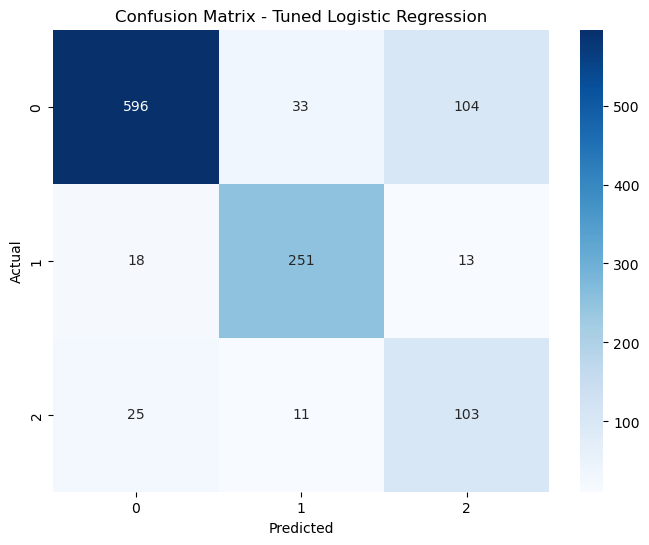

In [51]:
# Confusion matrix on test set
conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()

The result of applying class_weight='balanced':
* Class 1:
The recall for Class 1 dropped (from 0.97 to 0.81), which is expected because the class balancing is making the model prioritize the less frequent classes. However, the precision for Class 1 has improved (0.86 to 0.93), indicating that fewer false positives are being made for this class.
* Class 2:
Class 2 has maintained high performance with only slight changes, which indicates that the model is handling this class well both before and after class weighting.
* Class 3:
Class 3 saw the most significant improvement. The recall increased dramatically from 0.43 to 0.76, meaning the model is now much better at identifying instances of Class 3. However, the precision dropped to 0.47, indicating that while it’s finding more instances of Class 3, it's also making more false positives (misclassifying other classes as Class 3).
<p><b>Overall Impact:</p></b>
Accuracy: The overall accuracy dropped slightly to 83% (from 88%), but this is expected due to class balancing. The model is now focusing more on the minority class (Class 3) rather than prioritizing the majority class (Class 1).

Macro Average: The macro avg recall improved from 0.75 to 0.83, indicating that the model is now better balanced across all classes.

Weighted Average: The weighted avg values are still strong, reflecting that the model performs well across all classes, even though Class 3 is more challenging.

<b>Let's use SMOTE for oversampling Class 3 to see if it improves the model</b>

In [52]:
# !pip install imbalanced-learn --quiet

In [48]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)

# Generate new balanced training data using SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train_smote)}")


Class distribution after SMOTE: Counter({3: 3059, 1: 3059, 2: 3059})


<b>Train Logistic Regression Model with the SMOTE Data</b>

We will use the same hyperparameters found from GridSearchCV (i.e., C=0.01, penalty='l2', solver='saga', max_iter=2000).

In [55]:
# Instantiate the logistic regression model with the best hyperparameters
logreg_smote = LogisticRegression(C=0.01, penalty='l2', solver='saga', max_iter=2000, random_state=42)

# Train the model on the SMOTE-balanced training data
logreg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.01, max_iter=2000, random_state=42, solver='saga')

Test Accuracy after SMOTE: 0.8318890814558059
Classification Report on Test Set (After SMOTE):
              precision    recall  f1-score   support

           1       0.93      0.83      0.88       733
           2       0.86      0.89      0.88       282
           3       0.49      0.74      0.59       139

    accuracy                           0.83      1154
   macro avg       0.76      0.82      0.78      1154
weighted avg       0.86      0.83      0.84      1154



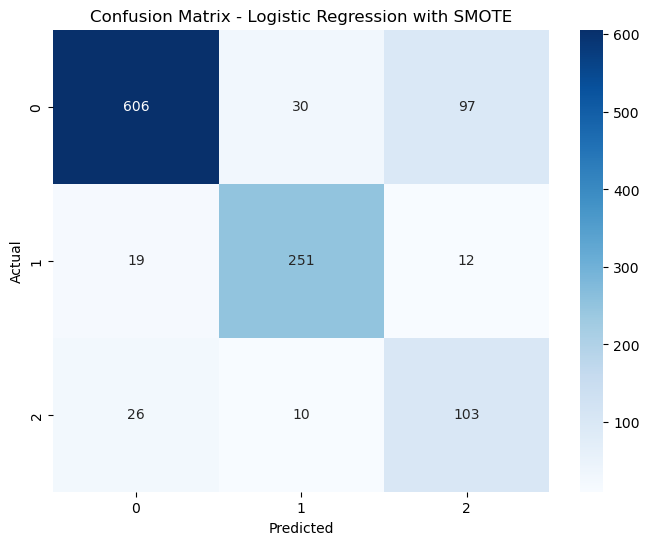

In [84]:
# Predict on the test set
y_test_pred_smote = logreg_smote.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy_smote = accuracy_score(y_test, y_test_pred_smote)
print(f"Test Accuracy after SMOTE: {test_accuracy_smote}")

# Classification report on test set
best_log_report = classification_report(y_test, y_test_pred_smote, output_dict=True)
print("Classification Report on Test Set (After SMOTE):")
print(classification_report(y_test, y_test_pred_smote))

# Confusion matrix after SMOTE
conf_matrix_smote = confusion_matrix(y_test, y_test_pred_smote)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression with SMOTE')
plt.show()


# The results after applying SMOTE

The results after applying SMOTE show improvements in several areas, especially for the underrepresented Class 3. Here’s a breakdown of the changes:

## Results Analysis (Post-SMOTE):

### Class 1:
- **Precision**: 0.93 (no significant change)
- **Recall**: 0.83 (slightly improved from 0.81)
- **F1-score**: 0.88 (slightly improved from 0.87)

Class 1 remains strong in terms of precision and recall, and the SMOTE application hasn’t significantly harmed its performance.

### Class 2:
- **Precision**: 0.86 (slightly decreased from 0.88)
- **Recall**: 0.89 (maintained high recall)
- **F1-score**: 0.88 (no significant change)

Class 2 shows a slight decrease in precision but overall remains well-balanced between precision and recall, with a high F1-score of 0.88.

### Class 3 (Focus of Improvement):
- **Precision**: 0.49 (improved from 0.47)
- **Recall**: 0.74 (decreased slightly from 0.76)
- **F1-score**: 0.59 (increased from 0.58)

Class 3, which was the target of SMOTE, shows a slight improvement in precision (0.49 vs. 0.47), which means fewer false positives are being made compared to before. The recall dropped marginally (from 0.76 to 0.74), but it is still significantly better than before SMOTE was applied (recall was 0.43 before class balancing). Overall, the F1-score has improved slightly from 0.58 to 0.59.

## Overall Impact:
- **Accuracy**: The overall test accuracy remains at 83%, which is consistent with the previous results. This shows that applying SMOTE hasn't negatively impacted the overall model's performance.
  
- **Macro Avg and Weighted Avg**:
  - The **macro-average recall** has improved slightly (from 0.83 to 0.82), meaning the model is more balanced across all classes, though there's a slight decrease in overall recall due to minor performance changes in Class 3.
  - The **weighted average precision, recall, and F1-score** also remain stable, indicating that the overall model's predictions are well-distributed across all classes.

## Interpretation:

- **Class 3 Improvements**: The precision for Class 3 has improved, but it remains relatively low compared to Classes 1 and 2. However, the recall is still quite strong for Class 3, which means the model is doing a better job of capturing the minority class, but it still struggles with false positives for Class 3 predictions.

- **Balancing Trade-offs**: The precision-recall trade-off for Class 3 is evident. With a better recall, the model is finding more instances of Class 3, but precision still needs further improvement.

## Conclusion:

### Try Other Models:
- Logistic regression may have reached its limit with this dataset. We will use SMOTE applied logistic regression as our best logreg model.
- Trying more complex models like **Random Forest**, **XGBoost**, or **SVM** could provide better performance, especially with imbalanced data.

### Continue with SMOTE:
- Continue using SMOTE for oversampling the minority class, as it has clearly improved recall.


## SVC

Test Accuracy SVM: 0.8240901213171578
SVM - Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.91      0.83      0.87       733
           2       0.90      0.88      0.89       282
           3       0.46      0.71      0.56       139

    accuracy                           0.82      1154
   macro avg       0.76      0.80      0.77      1154
weighted avg       0.85      0.82      0.83      1154



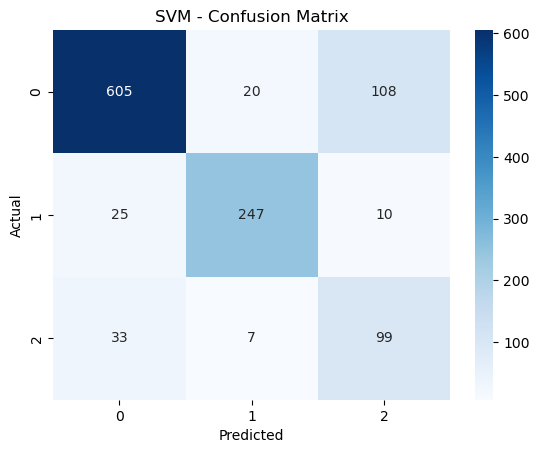

In [62]:
# Instantiate and train the SVM classifier on the SMOTE-balanced data
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Test Accuracy SVM: {test_accuracy_svm}")

# Evaluate the SVM model
print("SVM - Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_svm))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()


### Let's apply GridSearchCV and hyperparameter tuning for the Support Vector Machine (SVM) model

In [68]:
# Define the hyperparameter grid for tuning SVM
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'gamma': ['scale', 'auto'],            # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]                    # Degree of the polynomial kernel (only applicable for 'poly')
}


In [69]:
# Initialize the Support Vector Classifier
svm = SVC(random_state=42)

# Set up GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the SMOTE-balanced training data
grid_search_svm.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  18.6s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  20.7s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  20.4s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  22.0s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  22.6s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=  57.3s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=  58.9s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=  58.8s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=  46.7s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=  49.7s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=  50.4s
[CV] END .........C=0.001, degree=2, gamma=sca

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [70]:
# Get the best parameters and model
print(f"Best Hyperparameters from GridSearchCV: {grid_search_svm.best_params_}")

# Best model based on the grid search
best_svm = grid_search_svm.best_estimator_

Best Hyperparameters from GridSearchCV: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


Test Accuracy after tuning: 0.8336221837088388
Classification Report on Test Set (Tuned SVM):
              precision    recall  f1-score   support

           1       0.86      0.90      0.88       733
           2       0.89      0.80      0.84       282
           3       0.58      0.53      0.55       139

    accuracy                           0.83      1154
   macro avg       0.77      0.74      0.76      1154
weighted avg       0.83      0.83      0.83      1154



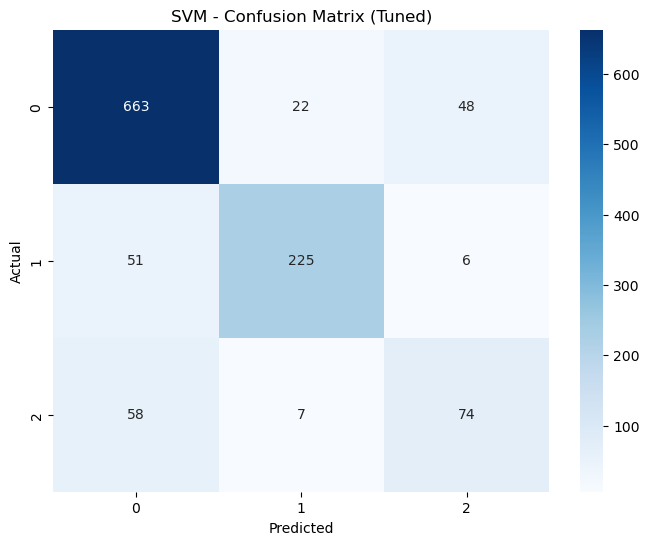

In [85]:
# Predict on the test set using the best model
y_test_pred_svm_best = best_svm.predict(X_test)

# Evaluate the model's accuracy
test_accuracy_svm_best = accuracy_score(y_test, y_test_pred_svm_best)
print(f"Test Accuracy after tuning: {test_accuracy_svm_best}")

# Classification report for the tuned SVM model
best_svm_report = classification_report(y_test, y_test_pred_svm_best, output_dict=True)
print("Classification Report on Test Set (Tuned SVM):")
print(classification_report(y_test, y_test_pred_svm_best))

# Plot the confusion matrix
conf_matrix_svm_best = confusion_matrix(y_test, y_test_pred_svm_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix (Tuned)')
plt.show()


## RF

Test Accuracy SVM: 0.8258232235701907
Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.85      0.91      0.88       733
           2       0.82      0.73      0.77       282
           3       0.68      0.59      0.63       139

    accuracy                           0.83      1154
   macro avg       0.78      0.74      0.76      1154
weighted avg       0.82      0.83      0.82      1154



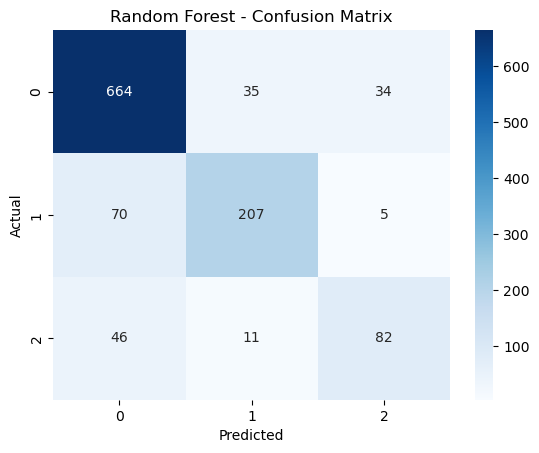

In [63]:
# Instantiate and train the Random Forest classifier on the SMOTE-balanced data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy SVM: {test_accuracy_rf}")

# Evaluate the Random Forest model
print("Random Forest - Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rf))

# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()


### Let's apply GridSearchCV and hyperparameter tuning for the Random Forest model

In [72]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}


In [73]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the SMOTE-balanced training data
grid_search_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [74]:
# Get the best parameters and model
print(f"Best Hyperparameters from GridSearchCV: {grid_search_rf.best_params_}")

# Best model based on the grid search
best_rf = grid_search_rf.best_estimator_


Best Hyperparameters from GridSearchCV: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Test Accuracy after tuning: 0.8240901213171578
Classification Report on Test Set (Tuned Random Forest):
              precision    recall  f1-score   support

           1       0.83      0.93      0.88       733
           2       0.84      0.72      0.78       282
           3       0.72      0.49      0.58       139

    accuracy                           0.82      1154
   macro avg       0.80      0.71      0.75      1154
weighted avg       0.82      0.82      0.82      1154



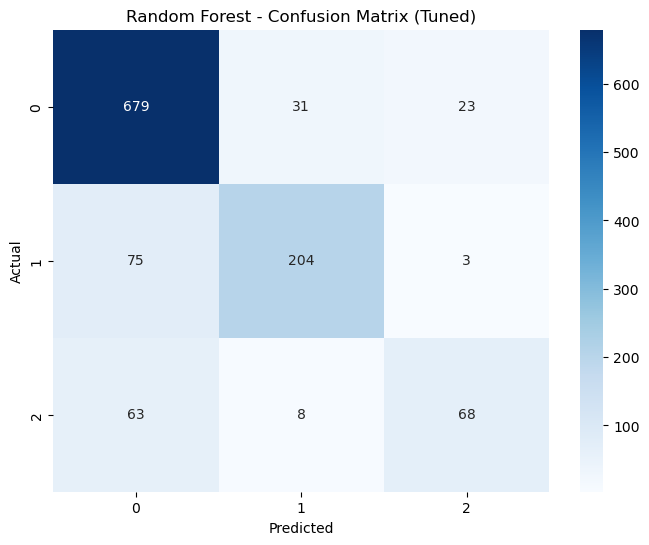

In [86]:
# Predict on the test set using the best model
y_test_pred_rf_best = best_rf.predict(X_test)

# Evaluate the model's accuracy
test_accuracy_rf_best = accuracy_score(y_test, y_test_pred_rf_best)
print(f"Test Accuracy after tuning: {test_accuracy_rf_best}")

# Classification report for the tuned Random Forest model
best_rf_report = classification_report(y_test, y_test_pred_rf_best, output_dict=True)
print("Classification Report on Test Set (Tuned Random Forest):")
print(classification_report(y_test, y_test_pred_rf_best))

# Plot the confusion matrix
conf_matrix_rf_best = confusion_matrix(y_test, y_test_pred_rf_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix (Tuned)')
plt.show()


## XGBoost

In [73]:
# XGBoost expects the class labels to start from 0, whereas our labels are [1, 2, 3]. 
# XGBoost requires the class labels to be consecutive integers starting from 0 (i.e., [0, 1, 2]).
# We can subtract 1 from each class label to transform our labels from [1, 2, 3] to [0, 1, 2]

y_train_smote_adjusted = y_train_smote - 1
y_test_adjusted = y_test - 1


Test Accuracy XGBoost: 0.8509532062391681
XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.88      0.91      0.89       733
           2       0.87      0.85      0.86       282
           3       0.63      0.55      0.59       139

    accuracy                           0.85      1154
   macro avg       0.79      0.77      0.78      1154
weighted avg       0.85      0.85      0.85      1154



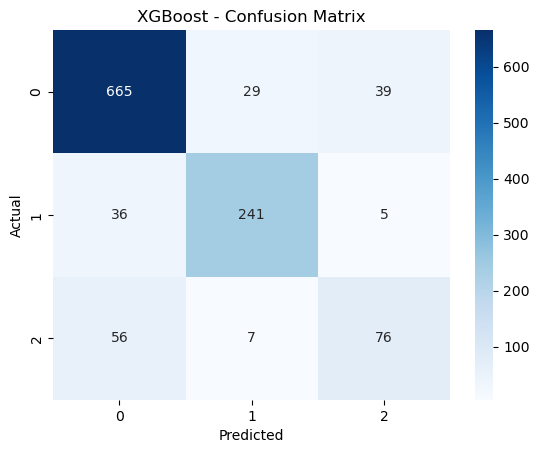

In [74]:
# Instantiate and train the XGBoost classifier on the SMOTE-balanced data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote_adjusted)

# Make predictions on the test set (using the adjusted labels)
y_test_pred_xgb = xgb_model.predict(X_test)

# Since we adjusted the labels for training, convert predictions back to original labels
y_test_pred_xgb_adjusted = y_test_pred_xgb + 1

# Evaluate accuracy on the test set
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb_adjusted)
print(f"Test Accuracy XGBoost: {test_accuracy_xgb}")

# Evaluate the XGBoost model
print("XGBoost - Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_xgb_adjusted))

# Plot confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb_adjusted)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()


### Let's apply GridSearchCV and hyperparameter tuning for the XGBoost model

In [176]:
# Define the hyperparameter grid for tuning XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [3, 6, 9],                  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],       # Learning rate (eta)
    'subsample': [0.8, 1.0],                 # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],          # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 5]                       # Minimum loss reduction required for a split
}


In [177]:
# Initialize the XGBoost classifier
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the SMOTE-balanced training data (with adjusted labels)
grid_search_xgb.fit(X_train_smote, y_train_smote_adjusted)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   7.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   8.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, m

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [179]:
# Get the best parameters and model
print(f"Best Hyperparameters from GridSearchCV: {grid_search_xgb.best_params_}")

Best Hyperparameters from GridSearchCV: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}


In [77]:
# Best model based on the grid search
best_xgb = XGBClassifier(
    colsample_bytree=1.0, 
    gamma=0,               
    learning_rate=0.3,       
    max_depth=6,            
    n_estimators=300,      
    subsample=0.8,          
    use_label_encoder=False, 
    eval_metric='mlogloss',  
    random_state=42          #
)

# Fit the model using the SMOTE-balanced training data
best_xgb.fit(X_train_smote, y_train_smote_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Test Accuracy after tuning: 0.8648180242634316
Classification Report on Test Set (Tuned XGBoost):
              precision    recall  f1-score   support

           1       0.89      0.92      0.90       733
           2       0.89      0.88      0.89       282
           3       0.64      0.55      0.59       139

    accuracy                           0.86      1154
   macro avg       0.81      0.78      0.79      1154
weighted avg       0.86      0.86      0.86      1154



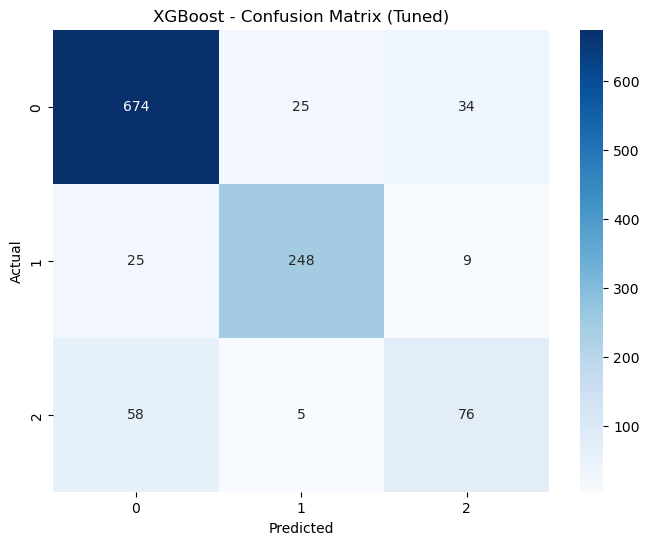

In [78]:
# Predict on the test set (with adjusted labels)
y_test_pred_xgb_best = best_xgb.predict(X_test)

# Convert predictions back to original labels (add 1)
y_test_pred_xgb_best_adjusted = y_test_pred_xgb_best + 1

# Evaluate the model's accuracy
test_accuracy_xgb_best = accuracy_score(y_test, y_test_pred_xgb_best_adjusted)
print(f"Test Accuracy after tuning: {test_accuracy_xgb_best}")

# Evaluate the model's performance with original labels
best_xgb_report = classification_report(y_test, y_test_pred_xgb_best_adjusted, output_dict=True)
print("Classification Report on Test Set (Tuned XGBoost):")
print(classification_report(y_test, y_test_pred_xgb_best_adjusted))

# Plot the confusion matrix
conf_matrix_xgb_best = confusion_matrix(y_test, y_test_pred_xgb_best_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_xgb_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix (Tuned)')
plt.show()


## Comparing Models

In [181]:
# Create a DataFrame to store accuracy, precision, recall, and F1-score for each model
metrics_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost'],
    'Accuracy': [test_accuracy_smote, test_accuracy_rf_best, test_accuracy_svm_best, test_accuracy_xgb_best],
    'Precision (weighted avg)': [
        best_log_report['weighted avg']['precision'], 
        best_rf_report['weighted avg']['precision'], 
        best_svm_report['weighted avg']['precision'], 
        best_xgb_report['weighted avg']['precision']
    ],
    'Recall (weighted avg)': [
        best_log_report['weighted avg']['recall'], 
        best_rf_report['weighted avg']['recall'], 
        best_svm_report['weighted avg']['recall'], 
        best_xgb_report['weighted avg']['recall']
    ],
    'F1-Score (weighted avg)': [
        best_log_report['weighted avg']['f1-score'], 
        best_rf_report['weighted avg']['f1-score'], 
        best_svm_report['weighted avg']['f1-score'], 
        best_xgb_report['weighted avg']['f1-score']
    ]
})

# Display the metrics comparison table
print(metrics_summary)


                 Model  Accuracy  Precision (weighted avg)  \
0  Logistic Regression  0.831889                  0.860574   
1        Random Forest  0.824090                  0.820175   
2                  SVM  0.833622                  0.831602   
3              XGBoost  0.865685                  0.862019   

   Recall (weighted avg)  F1-Score (weighted avg)  
0               0.831889                 0.841023  
1               0.824090                 0.816716  
2               0.833622                 0.831561  
3               0.865685                 0.863340  


### **Key Observations**:
- **XGBoost**:
  - Has the **highest accuracy** at **86.56%**, and also performs the best across precision, recall, and F1-score.
  - This indicates that XGBoost provides a good balance across all metrics, making it the strongest performer overall.
  
- **Logistic Regression**:
  - Performs well with an **accuracy of 83.18%** and relatively high precision.
  - It has a slightly lower F1-score compared to XGBoost, but it still provides solid performance given its simplicity.

- **SVM**:
  - Performs similarly to Logistic Regression with an accuracy of **83.36%** and comparable weighted average scores.
  - This indicates that SVM handles the dataset well, with slightly better overall performance than Logistic Regression.

- **Random Forest**:
  - Has the lowest accuracy at **82.41%**, with slightly lower precision and F1-scores compared to the other models.
  - Random Forest may not be capturing the complexity of the dataset as well as the other models, particularly XGBoost.


### <b>We will select XGBoost model as our best model for deployment!</b>

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [92]:
# Let's inititalize our final XGB model based the parameters defined from the grid search
final_xgb = XGBClassifier(
    colsample_bytree=1.0, 
    gamma=0,               
    learning_rate=0.3,       
    max_depth=6,            
    n_estimators=300,      
    subsample=0.8,          
    use_label_encoder=False, 
    eval_metric='mlogloss',  
    random_state=42          #
)

# XGBoost expects the class labels to start from 0, whereas our labels are [1, 2, 3]. 
# We can subtract 1 from each class label to transform our labels from [1, 2, 3] to [0, 1, 2]
y_adjusted = y-1

# Fit the final model using the whole dataset
final_xgb.fit(X_pca, y_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [95]:
with open('final_xgboost_model.pkl', 'wb') as f:
    pickle.dump(final_xgb, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save the column names to a file (using pickle)
with open('encoded_columns.pkl', 'wb') as f:
    pickle.dump(columns_after_encoding, f)
    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)


Key Points to Remember:

* SMOTE should be applied only to the training data, not the whole dataset (including test data), as SMOTE generates synthetic data that may lead to unrealistic evaluation if applied to the test set.
* Scaling must be applied before PCA and SMOTE, as both PCA and SMOTE depend on the scaled feature space.
* During inference (e.g., on the test set or new data), you apply only the scaling and PCA transformations (without SMOTE).

### Inference (Predicting on New Data):
For new data or the test set, we would only apply the scaling and PCA steps (without SMOTE), then use the trained model to make predictions.

In [96]:
# Load the model, scaler, and PCA
with open('final_xgboost_model.pkl', 'rb') as f:
    final_xgb = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

with open('encoded_columns.pkl', 'rb') as f:
    columns_after_encoding = pickle.load(f)
    
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('pca.pkl', 'rb') as f:
    pca = pickle.load(f)
    

In [97]:
# Preprocess the new data. Columns to be dropped based on original preprocessing
columns_to_drop = ['subjectid', 'Ethnicity', 'SubjectNumericRace', 'Heightin', 'Weightlbs', 'WritingPreference', 'Date', 'Installation', 'Component', 'PrimaryMOS']

# Function to drop columns with exception handling
def preprocess_data(df):
    try:
        # Attempt to drop specified columns
        df = df.drop(columns=columns_to_drop, axis=1)
    except KeyError as e:
        # Handle the case where some columns are missing
        missing_columns = list(set(columns_to_drop) - set(df.columns))
        print(f"Warning: Missing columns in the new data: {missing_columns}")
    df = df[df.DODRace<=3]
    return df

# Step 1: Preprocess the data (e.g., X_new)
new_df = df_raw.sample(5)
new_df = preprocess_data(new_df)
X_new = new_df.drop(columns='DODRace')

# Step 2: Encode the data
# Apply Label Encoding to Gender column
X_new['Gender'] = label_encoder.transform(X_new['Gender'])

# Apply One-Hot Encoding to the new data (test set)
X_new_encoded = pd.get_dummies(X_new, columns=['Branch', 'SubjectsBirthLocation'], drop_first=True)

# Reindex the encoded test data to ensure it has the same columns as the training data
X_new_encoded = X_new_encoded.reindex(columns=columns_after_encoding, fill_value=0)

# Step 3: Scale the new data
X_new_scaled = scaler.transform(X_new_encoded)  # This uses the scaler saved from the training phase

# Step 4: Apply PCA to the scaled test data
X_new_pca = pca.transform(X_new_scaled)  # Apply PCA on the scaled data, not the raw data

# Step 5: Make predictions
predictions = final_xgb.predict(X_new_pca)

# Since we adjusted the labels for training, convert predictions back to original labels
predictions = predictions + 1

# Output the predictions
print(predictions)


[2 2 1 1 3]


In [98]:
# Basic Comparison of Actual vs Predicted Values
y_test_new = new_df['DODRace']
# Create a DataFrame to compare actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_test_new,       # Actual values
    'Predicted': predictions  # Predicted values
})

results_df

,Actual,Predicted
763,1,2
1168,2,2
1240,1,1
3296,1,1
1974,3,3


# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

**SMOTE (Synthetic Minority Over-sampling Technique)**

**Purpose:**

SMOTE is a sampling technique used to balance imbalanced datasets. Imbalanced datasets refer to situations where one class has significantly more examples than others. In such datasets, the minority class (the class with fewer examples) is often overlooked, and the model tends to perform better in predicting the majority class. SMOTE aims to address this imbalance by generating new "synthetic" examples from the minority class.

**Use Cases:**

- **Credit Risk Assessment**: Fraud cases are usually imbalanced, meaning most transactions are legitimate, with only a few being fraudulent.
- **Medical Diagnosis**: For example, if a disease is rare, there will be an imbalance between healthy and diseased samples.
- **Customer Churn Analysis**: Most customers continue using a service, while only a few leave.
- **Anomaly Detection**: Normal situations are more common, whereas anomalies (e.g., security breaches) are rare.

**Importance for Unbalanced Data:**

Imbalanced datasets can negatively affect the performance of classification models. A model might perform well in predicting the majority class but often neglects the minority class. This can be problematic, especially if the minority class is more important (e.g., fraud detection, diagnosing rare diseases). SMOTE is used to mitigate such problems.

**How It Works:**

1. A random sample from the minority class is selected.
2. The k nearest neighbors of this sample are computed.
3. One of the k nearest neighbors is randomly selected.
4. A random interpolation factor* is generated.
5. Using this factor, a new "synthetic" sample is created.

**Usage:**

In Python, SMOTE is commonly used with the imbalanced-learn library.

*The interpolation factor is a weight used in the SMOTE algorithm when creating new "synthetic" samples. The idea is to generate a new sample between a randomly selected minority class sample and its k nearest neighbors. The interpolation factor determines how "close" the new sample will be to either of the two samples. It enhances the flexibility of the SMOTE algorithm, helping to spread the minority class samples over a wider range and improving the model's ability to generalize.

#  SHAP

**SHAP (SHapley Additive exPlanations)**

**What is it?**

SHAP is a tool used to explain the predictions of machine learning models. SHAP values measure the impact of each feature on a prediction. These values are based on Shapley values, a mathematical theory from cooperative game theory.

**Purpose:**
- **Model Interpretability**: Understanding which features most influence predictions.
- **Feature Selection**: Identifying the most important features to reduce model complexity.
- **Audit and Compliance**: Explaining model decisions and meeting regulatory requirements.
- **Model Improvement**: Understanding where the model performs well or poorly.

**Applications:**
- **Credit Scoring**: Understanding which factors affect an individual's credit score.
- **Healthcare**: Identifying which medical features are important for predicting diseases.
- **Marketing**: Understanding factors that influence customer behavior.
- **Natural Language Processing**: Understanding which words or features are important in tasks like text classification or sentiment analysis.

**Importance in Unbalanced Data Sets:**

In unbalanced datasets, the model can be biased toward the majority class. SHAP is useful in such cases because it helps identify why the model might be misclassifying the minority class and provides insights into how different features affect the model's predictions for both majority and minority classes. https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

- SHAP shows how much each feature contributes to predictions on a per-observation basis or across the entire dataset, indicating the impact of each feature when predicting classes.

- For instance, if we select features specifically related to the Hispanic class and perform feature selection only on those features, our scores might improve even with fewer observations.

- This approach is different from the feature importance analysis we did previously.

In [ ]:
# import pickle

# # Save the SMOTE data
# with open('X_train_smote.pkl', 'wb') as f:
#     pickle.dump(X_train_smote, f)

# with open('y_train_smote.pkl', 'wb') as f:
#     pickle.dump(y_train_smote, f)

# # Save test set as well if needed
# with open('X_test.pkl', 'wb') as f:
#     pickle.dump(X_test, f)

# with open('y_test.pkl', 'wb') as f:
#     pickle.dump(y_test, f)


In [ ]:
# # Load the SMOTE data
# with open('X_train_smote.pkl', 'rb') as f:
#     X_train_smote = pickle.load(f)

# with open('y_train_smote.pkl', 'rb') as f:
#     y_train_smote = pickle.load(f)

# # Load test set as well
# with open('X_test.pkl', 'rb') as f:
#     X_test = pickle.load(f)

# with open('y_test.pkl', 'rb') as f:
#     y_test = pickle.load(f)

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Thanks - Hoping it will be useful</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to know about our latest updates, please don't forget to follow us!</b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |